# Introduction

Lab 2 focuses on Time Series Forecasting. First we focus our attention on four metro areas in Arkansas. The metro areas have different zipcodes associated with them, so we have to aggragate the data by metro area in order to be able to visualize the trends over time per metro area. Secondly, the lab asks us to find which three zipcodes we should invest in. The lab does not crearly state the metrics necessary to do choose, but through simple analysis, we can determine the best metric for the job.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

# Path

In [2]:
pwd

'/Users/ramosem/Documents/SyracuseUniversity/4th_Quarter/IST718/Lab2'

In [3]:
path = '/Users/ramosem/Documents/SyracuseUniversity/4th_Quarter/IST718/Lab2/'

# Read Data

In [4]:
fileName = 'Zip_Zhvi_SingleFamilyResidence'

In [5]:
df = pd.read_csv(path + fileName + '.csv')

In [6]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1413747.0,1405862.0,1402547.0,1390420.0,1381621.0,1375725.0,1374714.0,1381453.0,1385737.0,1389268.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,364892.0,...,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1528603.0,1514894.0,1502233.0,1492429.0,1486122.0,1480426.0,1476509.0,1478980.0,1479301.0,1474994.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200475.0,...,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,546663.0,...,1207765.0,1208853.0,1208481.0,1206304.0,1204013.0,1201182.0,1198879.0,1198277.0,1199900.0,1200980.0


# PreAnalyze

In [7]:
df['RegionID'].nunique()

30464

In [8]:
df.describe()

,RegionID,SizeRank,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
count,30464.000000,30464.000000,30464.000000,1.322400e+04,1.347200e+04,1.351000e+04,1.353200e+04,1.361700e+04,1.365200e+04,1.367500e+04,...,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04
mean,80411.444032,15971.949875,48773.301110,1.287668e+05,1.284274e+05,1.283393e+05,1.283755e+05,1.284372e+05,1.284450e+05,1.287817e+05,...,2.316270e+05,2.322013e+05,2.328094e+05,2.334704e+05,2.341255e+05,2.347233e+05,2.353932e+05,2.361603e+05,2.370185e+05,2.378982e+05
std,25500.467961,9602.814124,27437.793823,8.932606e+04,8.923079e+04,8.908503e+04,8.891757e+04,8.878505e+04,8.866373e+04,9.173599e+04,...,2.744219e+05,2.745258e+05,2.745434e+05,2.747149e+05,2.748821e+05,2.751632e+05,2.759450e+05,2.772066e+05,2.787410e+05,2.801460e+05
min,58001.000000,0.000000,501.000000,1.067200e+04,1.065500e+04,1.067300e+04,1.066800e+04,1.067700e+04,1.059500e+04,1.047700e+04,...,1.051600e+04,1.056000e+04,1.059900e+04,1.067800e+04,1.073700e+04,1.086000e+04,1.103500e+04,1.121800e+04,1.137200e+04,1.149200e+04
25%,68822.750000,7688.000000,25867.250000,7.188575e+04,7.167675e+04,7.167450e+04,7.179450e+04,7.187400e+04,7.197175e+04,7.207500e+04,...,1.035932e+05,1.040092e+05,1.043135e+05,1.046772e+05,1.049818e+05,1.052908e+05,1.056270e+05,1.058540e+05,1.061430e+05,1.064082e+05
50%,79170.500000,15497.000000,48313.500000,1.083435e+05,1.078815e+05,1.077805e+05,1.078935e+05,1.078990e+05,1.080335e+05,1.082100e+05,...,1.608075e+05,1.614010e+05,1.621690e+05,1.627390e+05,1.634350e+05,1.640095e+05,1.645335e+05,1.650715e+05,1.655705e+05,1.660700e+05
75%,89238.250000,24073.000000,71740.500000,1.604298e+05,1.598525e+05,1.596290e+05,1.595368e+05,1.595160e+05,1.598925e+05,1.601715e+05,...,2.621595e+05,2.631830e+05,2.641112e+05,2.649178e+05,2.658900e+05,2.666098e+05,2.674230e+05,2.683828e+05,2.692755e+05,2.702558e+05
max,753844.000000,35187.000000,99929.000000,1.749532e+06,1.744909e+06,1.726037e+06,1.696812e+06,1.649586e+06,1.602308e+06,2.920398e+06,...,8.665174e+06,8.704005e+06,8.653878e+06,8.558984e+06,8.451378e+06,8.356810e+06,8.303433e+06,8.293072e+06,8.271645e+06,8.221444e+06


In [9]:
dates = df.columns.values[9:]

# Part 1:

Provide an initial data analysis to include (but not limited to): <br>
▪ Develop time series plots for the following Arkansas metro areas:<br>
• Hot Springs, Little Rock, Fayetteville, Searcy<br>
• Present all values from 1997 to present<br>
• Average at the metro area level<br>

## Get the Subset of The Metro Areas

In [10]:
cityOfInterst = ['Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy']

In [11]:
arCity = df.loc[df['Metro'].isin(cityOfInterst)].reset_index(drop=True)

In [12]:
arCity['Metro'].unique()

array(['Fayetteville', 'Hot Springs', 'Searcy'], dtype=object)

### Little Rock Does Not Have a Metro Area Named after it

In [13]:
df.loc[df['City'] == 'Little Rock'].head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
2610,89442,2628,72204,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,47506.0,...,72297.0,72162.0,72250.0,72332.0,72976.0,73492.0,74355.0,75124.0,76106.0,76895.0
3176,89446,3203,72209,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,48395.0,...,73613.0,73328.0,72997.0,72800.0,73261.0,73445.0,73738.0,73768.0,74577.0,75424.0


Little Rock Metro area is called Little Rock-North Little Rock-Conway.

In [14]:
lr = df.loc[[False if pd.isnull(x) else x for x in df['Metro'].str.contains('Little Rock')]]

We append the Little Rock metro area to our dataset

In [15]:
arCity = pd.concat([arCity, lr])

In [16]:
arCity.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,69849,215,28314,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,91738.0,...,124299.0,124389.0,124643.0,124785.0,125022.0,125708.0,126576.0,127449.0,127791.0,128149.0
1,89249,332,71913,Zip,AR,AR,Hot Springs,Hot Springs,Garland County,91204.0,...,158061.0,158528.0,159213.0,160118.0,161110.0,161806.0,162347.0,163134.0,164485.0,166238.0
2,69842,1309,28306,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,113111.0,...,159607.0,159496.0,159711.0,160011.0,160450.0,161232.0,162215.0,163196.0,163748.0,164245.0
3,69902,1457,28376,Zip,NC,NC,Raeford,Fayetteville,Hoke County,NaN,...,178186.0,178673.0,179091.0,179431.0,179704.0,179780.0,179884.0,179991.0,180248.0,180527.0
4,69847,1535,28311,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,99811.0,...,135627.0,135708.0,136097.0,136413.0,136634.0,137330.0,138309.0,139264.0,139653.0,140037.0


In [17]:
arCity['Metro'].unique()

array(['Fayetteville', 'Hot Springs', 'Searcy',
       'Little Rock-North Little Rock-Conway'], dtype=object)

## Only look at 1997 onwards

In [18]:
on97 = [x for x in dates if np.datetime64(x) >= np.datetime64('1997-01')]

In [19]:
on97[:5]

['1997-01-31', '1997-02-28', '1997-03-31', '1997-04-30', '1997-05-31']

In [20]:
on97Dates = [np.datetime64(x) for x in on97] # Convert Strings to np.datetime64

## Group By Metro Area

In [21]:
arCityAv = arCity[['Metro']+on97].groupby(['Metro']).agg(np.nanmean)

In [22]:
arCityAv

,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
Metro,,,,,,,,,,,,,,,,,,,,,
Fayetteville,100072.230769,100048.923077,100061.769231,100058.000000,100183.769231,100066.923077,100088.615385,100135.538462,100378.076923,100122.692308,...,137884.812500,137801.062500,138057.625000,138239.375000,138617.500000,139208.687500,139931.437500,140591.125000,140992.875000,141523.312500
Hot Springs,77182.600000,77657.400000,77872.800000,77722.000000,77370.400000,77363.800000,77931.200000,78521.000000,79080.400000,78898.800000,...,130194.714286,130269.714286,130643.285714,131520.857143,132674.000000,133555.714286,134451.857143,135230.142857,136497.142857,137892.571429
Little Rock-North Little Rock-Conway,87378.959184,87692.673469,87890.285714,88178.959184,88397.102041,88617.755102,88776.408163,89037.326531,89457.693878,89739.448980,...,137957.419355,137967.725806,138232.258065,138562.548387,139092.919355,139401.790323,139585.387097,139714.419355,139935.032258,140491.000000
Searcy,57560.583333,57887.666667,58211.000000,58466.000000,58640.083333,58765.833333,58921.583333,59028.333333,59160.333333,59267.333333,...,87910.222222,88080.166667,87890.888889,87739.555556,87566.888889,87297.888889,86611.722222,86112.388889,86010.611111,86115.611111


## Plot Time Series

Text(0, 0.5, 'Median House Price')

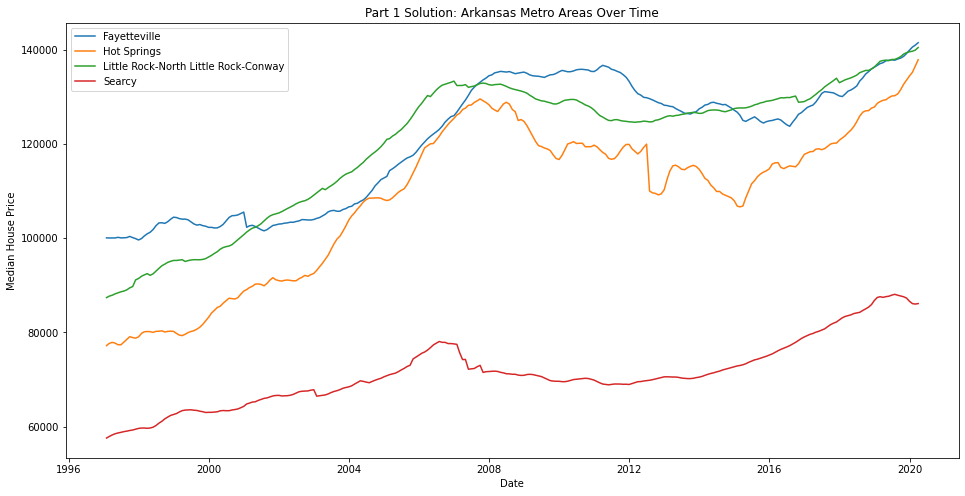

In [23]:
plt.figure(figsize=(16,8))

for idx, row in arCityAv.iterrows():
    plt.plot(on97Dates, row[on97].values, label=idx)
plt.legend()
plt.title('Part 1 Solution: Arkansas Metro Areas Over Time')
plt.xlabel('Date')
plt.ylabel('Median House Price')

# Part 2: 
The research question is can we predict which three zip codes provide the best investment
opportunity for the Syracuse Real Estate Investment Trust (SREIT)? 

## Get Rid Of Columns Before 1997

In [24]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'],
      dtype='object', length=300)

## Analyze Dataset

### Check for Duplicates

In [25]:
df['RegionID'].value_counts().sort_values().max()

1

There are no duplicate regions.

### Time Series Plot

Text(0, 0.5, 'Median House Price')

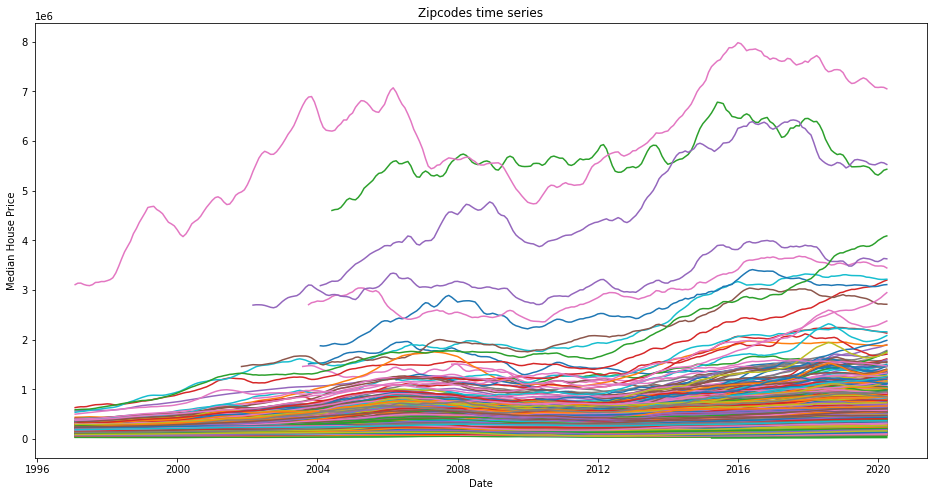

In [26]:
plt.figure(figsize=(16,8))

for idx, row in df.iloc[:1000].iterrows():
    plt.plot(on97Dates, row[on97].values, label=idx)
# plt.legend()
plt.title('Zipcodes time series')
plt.xlabel('Date')
plt.ylabel('Median House Price')

Most zipcodes are below a million dollars.

### Check When all Zipcodes have values

In [27]:
counts = []
for date in on97:
    counts.append(df[date].count())
on97Counts = pd.DataFrame(zip(on97, counts), columns=['Date', 'Count'])
on97Counts['Date'] = on97Counts['Date'].astype(np.datetime64)

Text(0, 0.5, 'Number of Zipcodes Popuated')

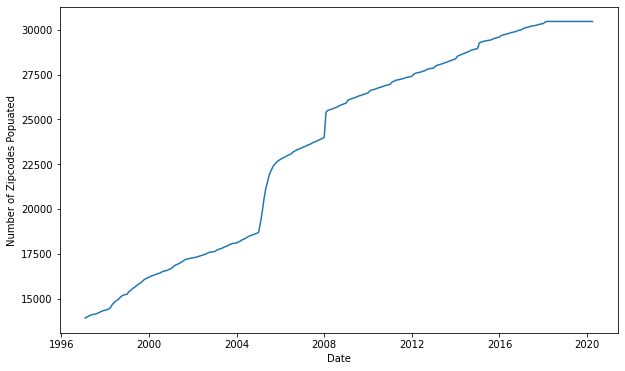

In [28]:
plt.figure(figsize=(10,6))
plt.plot(on97Counts['Date'], on97Counts['Count'])
plt.xlabel('Date')
plt.ylabel('Number of Zipcodes Popuated')

In [29]:
on97Counts.loc[on97Counts['Count'] == len(df)].head()

,Date,Count
253,2018-02-28,30464
254,2018-03-31,30464
255,2018-04-30,30464
256,2018-05-31,30464
257,2018-06-30,30464


Starting 2018, all zipcodes are finally populated. Since we will be predicting the latest date, we do not have to drop any zip codes from the analysis. We will have to preprocess some zipcodes since they are not fully populated till a certain time. This might lower our accuracy in zipcodes that only have data for a small amount of time.

In [30]:
on97Counts.loc[on97Counts['Date'].astype(str).str.contains('2020')].tail(3)

,Date,Count
276,2020-01-31,30464
277,2020-02-29,30464
278,2020-03-31,30464


2020 has a total of 30464 zip codes populated.

In [31]:
on97Counts.loc[on97Counts['Date'].astype(str).str.contains('1997')].head(3)

,Date,Count
0,1997-01-31,13913
1,1997-02-28,13961
2,1997-03-31,14019


1997 only has 13913 zip codes populated.. 

## Look at Counts Per Zip Code

#### First we need to perform some transformations in the data in order to calculate the counts per zip code

In [32]:
dd = df.drop(['SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], axis=1)

In [33]:
dd = dd.set_index('RegionID')

In [34]:
dp = dd.transpose()

In [35]:
dp.head()

RegionID,61639,84654,61637,91982,84616,91940,61616,91733,93144,84640,...,59484,59376,60758,58084,58112,58111,58115,58117,58121,58125
1996-01-31,NaN,364892.0,NaN,200475.0,546663.0,97521.0,NaN,97381.0,82374.0,254388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-29,NaN,364162.0,NaN,200723.0,546231.0,97513.0,NaN,97405.0,82330.0,252774.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-31,NaN,363605.0,NaN,200526.0,545451.0,97471.0,NaN,97330.0,82300.0,251468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-30,NaN,362963.0,NaN,199337.0,545391.0,97491.0,NaN,97323.0,82263.0,248948.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-31,NaN,361660.0,NaN,198200.0,543066.0,97486.0,NaN,97280.0,82344.0,246695.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
zipCount = dp.count()

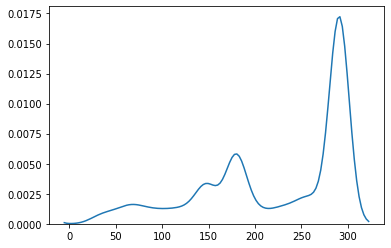

In [37]:
sns.kdeplot(zipCount)

In [38]:
zipCount.describe()

count    30464.000000
mean       221.713892
std         78.132404
min         26.000000
25%        170.000000
50%        256.000000
75%        291.000000
max        291.000000
dtype: float64

We can see how most of the zipcodes have between 250 to 300 values populate in the dataset. Since they have more data, it will likely increase its prediction accuracy.

## Group Zip Code by Year and Check if there is any correlation

In [39]:
dyear = dp.copy()

In [40]:
dyear.index.name = 'ds'
dyear = dyear.reset_index(drop=False)

In [41]:
dyear['year'] = dyear['ds'].astype(str).str[0:4]

In [42]:
dyear = dyear.groupby(['year']).mean().reset_index(drop=False)

(-5.0, 600000.0)

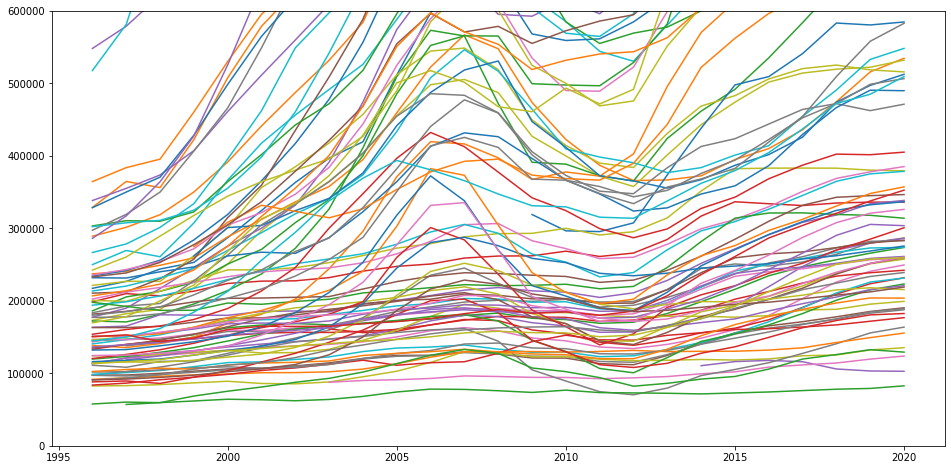

In [43]:
plt.figure(figsize=(16,8))
for col in dyear.columns[1:100]:
    plt.plot(dyear['year'].astype(int), dyear[col])
    
plt.ylim(-5, 600000)

We are all aware of the 2008 housing crisis which lowered the price of the housing market significatly. In the chart above, we see a huge drop among a big subset of zipcodes. Now because of the lack of computing power and the since this drop can cause a lack of accuracy, we will only fit the models with data past a certain date. On 2010, we see the data start to plateu, but around 2011, it started going back up again. Therefore, we will use 2011 as our lower limit for the modeling.

In [44]:
lowerDataLim = np.datetime64('2011-01-01')

## Split Train and Test Dataset

In order to create the model we need to create a training set and a test set. The test set is going to be the most recent date as the target while the training dataset is going to use the data from 6 months prior as the target.

### Find the most recent date.

In [45]:
testDate = on97Counts['Date'].max()
print('Test Date on Dataset: ', testDate)

Test Date on Dataset:  2020-03-31 00:00:00


In [46]:
trainDate = on97Counts['Date'].max() - np.timedelta64(6, 'M')
trainDate = on97Counts.loc[on97Counts['Date'] < trainDate]['Date'].values[-1]
print('Train Target Date on Dataset: ', trainDate)

Train Target Date on Dataset:  2019-09-30T00:00:00.000000000


## Create Facebook Profet Model

In [47]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


### Convert Dataset To Prophet Format

To input the data to the prophet, we need to convert the Data Frame into a friendly format for the prophet to work.

In [48]:
dp.columns.name = None # Get rid of column name
dp.index.names = ['ds'] # Convert Date columns to ds

In [49]:
zipCodes = dp.columns # Get list of Zip Codes

In [50]:
zipCodes = np.sort(zipCodes)

In [51]:
dp = dp.reset_index(drop=False) # Make Date a column rather than the index

In [52]:
dp['ds'] = dp['ds'].astype(np.datetime64)

### Create Data Frame with Predicted Values

In [53]:
future = pd.DataFrame([trainDate, testDate], columns=['ds'])

In [54]:
future

,ds
0,2019-09-30
1,2020-03-31


### Fit Model Using The Target Training Date

In [55]:
dp = dp.loc[((dp['ds'] <= trainDate) & (dp['ds'] >= lowerDataLim))].reset_index(drop=True) # Get subset of data used to train the model

In [56]:
# predictions = []
# count = 0
# for zip in zipCodes[5000:10000]:
#     m = Prophet(uncertainty_samples=0, interval_width=0.95, weekly_seasonality=False, daily_seasonality=False) # Define Prophet Model For Zip Code

#     dtemp = dp[['ds', zip]].rename(columns={zip: 'y', 'ds': 'ds'}) # Convert columns to Prophet-friendly columns 
#     dtemp = dtemp.dropna(axis=0) # Drop unpopulated dates
  
#     m.fit(dtemp) # Fit series

#     preds = m.predict(future)[['ds', 'yhat']] # Predict the train date and test date values

  
#     predictions.append([zip, dtemp.loc[dtemp['ds'] == trainDate]['y'].values[0], 
#                       preds['yhat'].values[0], preds['yhat'].values[1]]) # append data to the file dataset
  
#     print(count)
#     count += 1

In [57]:
# len(predictions)

## Calucate Accuracy and Opportunity of Growth

### Create DataFrame with Zip Code information

In [58]:
# zipPred = pd.DataFrame(predictions, columns=['zipcode', 'train', 'train_pred', 'test_pred']) # Create Dataframe with predictions per zipcode

In [59]:
# zipPred.to_csv(path + 'PredictionData12.csv') # Save Prediction to a CSV file since we do not want to run model more than once

In [60]:
# zipPred.head()

In [62]:
import glob

all_files = glob.glob(path + "Data/*.csv")

li = []

for filename in all_files:
    temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(temp)

preds = pd.concat(li, axis=0, ignore_index=True)
preds = preds.drop_duplicates(subset='zipcode')

In [63]:
len(preds)

15641

In [64]:
zipPred = preds.copy()

### Calcualte Error In Training Prediction

By Calculating the error in the training prediction, we can find out the risk associated with investing in a specific zipcode. If a zipcode is volatile, the prediction will have a high error. Therefore, if we see a high prediction on the training target date, we should be causious in investing there. On the other hand, if the prediction is very accurate, the risk factor shoudl be greatly reduced.

In [65]:
zipPred['trainError'] = 100*(zipPred['train'] - zipPred['train_pred']) / zipPred['train']

### Calculate Growth Percentage

The growth percentage comes from the test target date. We want to see if there is any potential growth in the zipcode. To do this, we use the model's prediction for six months from the training target date. Then we get the percentage increased or decreased. We want to avoid all decreased growth. Conversely, we want the most return possible from an investment which would be indicated by a big percentage increase or a high percent growth.  

In [66]:
zipPred['GrowthPerc'] = 100*(zipPred['test_pred'] - zipPred['train']) / zipPred['train']

# Find the Best Zip Codes

Text(0, 0.5, 'Growth Percentage')

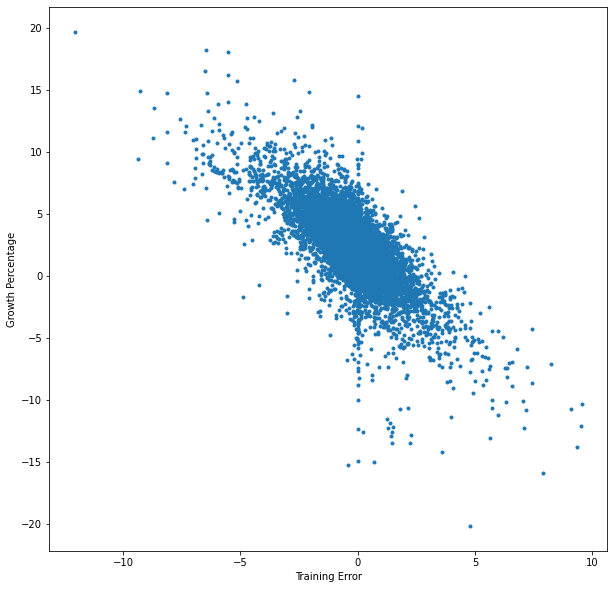

In [67]:
plt.figure(figsize=(10,10))

plt.plot(zipPred['trainError'],zipPred['GrowthPerc'], lw=0, marker='.')

plt.xlabel('Training Error')
plt.ylabel('Growth Percentage')

(-1.0, 15.0)

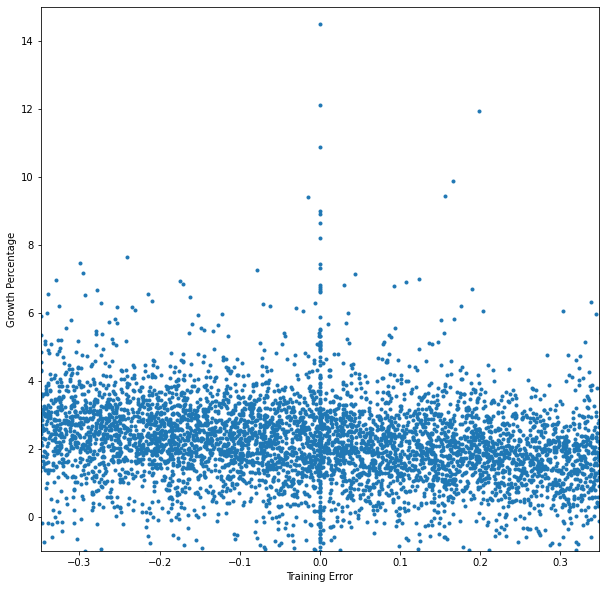

In [68]:
plt.figure(figsize=(10,10))

plt.plot(zipPred['trainError'],zipPred['GrowthPerc'], lw=0, marker='.')

plt.xlabel('Training Error')
plt.ylabel('Growth Percentage')

plt.xlim(-.348, .348)
plt.ylim(-1, 15)

The chart above shows us the best zipcodes. The closest to the x-axis and the farthest up corresponds to the zipcodes that we should be investing in since there is almost no risk and there is a big growth opportunity.

In [69]:
zipPred['trainError'].describe()

count    15641.000000
mean        -0.205933
std          1.248954
min        -12.068551
25%         -0.752037
50%         -0.139524
75%          0.370111
max          9.565491
Name: trainError, dtype: float64

In [70]:
best3 = zipPred.loc[((zipPred['trainError'] < .09) & (zipPred['trainError'] > -0.09))].sort_values(['GrowthPerc'], ascending=False).head(3)

(-1.0, 15.0)

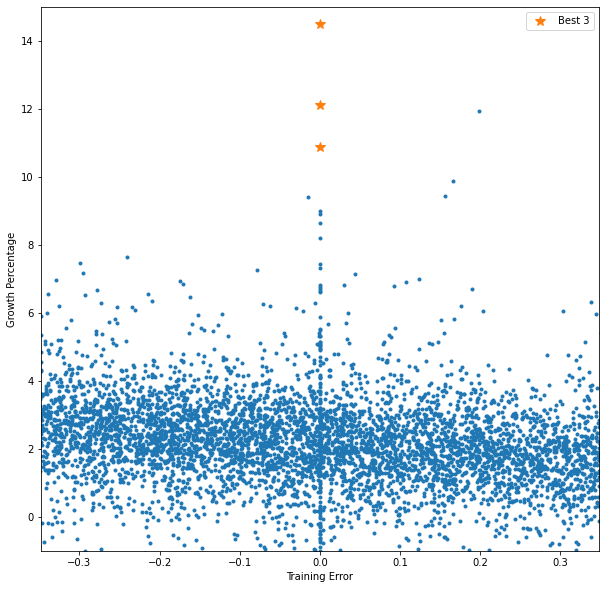

In [71]:
plt.figure(figsize=(10,10))

plt.plot(zipPred['trainError'],zipPred['GrowthPerc'], lw=0, marker='.')

plt.plot(best3['trainError'],best3['GrowthPerc'], lw=0, marker='*', markersize=10, label='Best 3')

plt.xlabel('Training Error')
plt.ylabel('Growth Percentage')
plt.legend()
plt.xlim(-.348, .348)
plt.ylim(-1, 15)

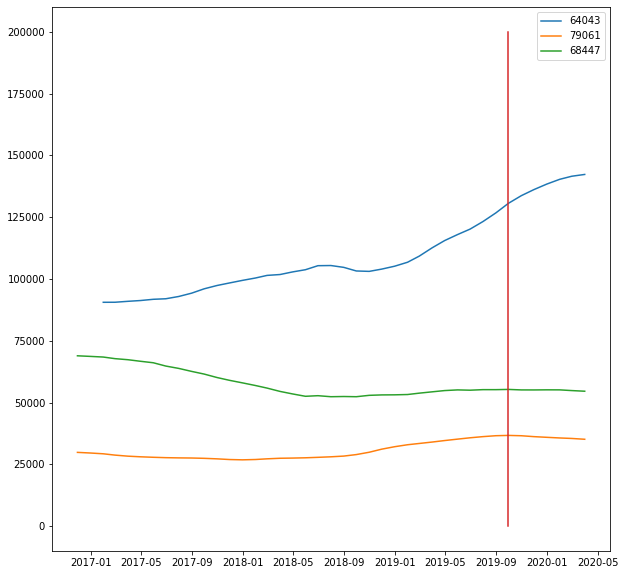

In [86]:
plt.figure(figsize=(10,10))

for zip in best3['zipcode']:
    
    temp = df.loc[df['RegionID'] == zip]
    
    dateL = []
    dateS = []
    for col in on97:
        if pd.isnull(df.loc[df['RegionID'] == zip][col].values[0]):
            continue
        else:
            dateS.append(col)
            dateL.append(np.datetime64(col))
    
    plt.plot(dateL, df.loc[df['RegionID'] == zip][dateS].values[0], label=zip)
    
plt.plot([trainDate, trainDate],[0, 200000])

plt.legend()

To find the best zipcodes, we first take a look at the subset with the smallest risk or the training error closest to 0. Then we sort by the Growth Percentage in Descending order and we are left with 3 zipcodes.

## Conclusion